In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from enum import Enum
from typing import Any, List

In [3]:
pillbox = np.load('pillbox.npy')

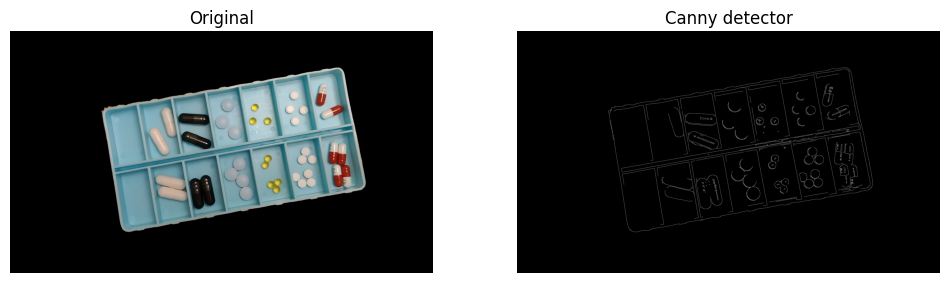

In [4]:
gray = cv2.cvtColor(pillbox, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
canny_pillbox = cv2.Canny(blurred, threshold1 = 60, threshold2 = 120, edges = None, apertureSize = 3)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pillbox)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(canny_pillbox, cmap = 'gray')
axs[1].set_title('Canny detector')
axs[1].axis('off')

plt.show()

In [5]:
def split_cells(img, canny_img):
    
    IMG_COPY = img.copy()
    BLACK_BACKGROUND = cv2.cvtColor(IMG_COPY, cv2.COLOR_RGB2GRAY)
    BLACK_BACKGROUND[BLACK_BACKGROUND == 0] = 255
    BLACK_BACKGROUND[BLACK_BACKGROUND != 0] = 255
    FILTERED_LINES = []
    
    def rhotheta2xy(rho, theta):
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 5000*(-b))
        y1 = int(y0 + 5000*(a))
        x2 = int(x0 - 5000*(-b))
        y2 = int(y0 - 5000*(a))
        return x1, y1, x2, y2
    
    lines = cv2.HoughLines(image = canny_img, 
                        rho = 1.1, 
                        theta = np.pi / 180, 
                        threshold = 220, 
                        lines = None, 
                        srn = 0, 
                        stn = 0)
    
    for rho, theta in lines[:, 0]:
        add_line = True
        for frho, ftheta in FILTERED_LINES:
            if abs(rho - frho) < 40 and abs(theta - ftheta) < np.deg2rad(5):
                add_line = False
                break
        if add_line:
            FILTERED_LINES.append((rho, theta))
    
    if FILTERED_LINES is not None: 
        for rho, theta in FILTERED_LINES:
            x1, y1, x2, y2 = rhotheta2xy(rho, theta)
            pt1 = x1, y1
            pt2 = x2, y2
            cv2.line(IMG_COPY, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)
            cv2.line(BLACK_BACKGROUND, pt1, pt2, (0, 0, 0), 2, cv2.LINE_AA)
            
    return IMG_COPY, BLACK_BACKGROUND

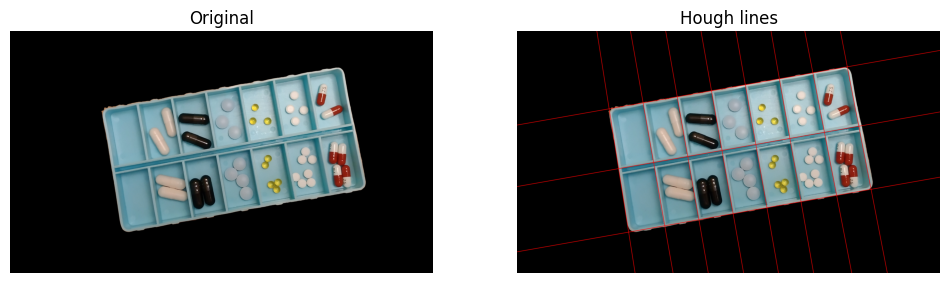

In [6]:
hough_pillbox, hough_lines = split_cells(pillbox, canny_pillbox)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pillbox)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(hough_pillbox, cmap = 'gray')
axs[1].set_title('Hough lines')
axs[1].axis('off')

plt.show()

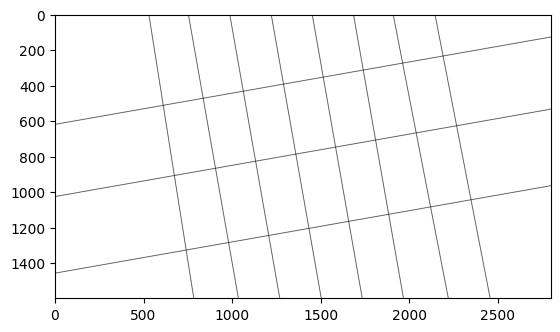

In [7]:
plt.imshow(hough_lines, cmap = 'gray')

In [58]:
labels

array([[ 1,  1,  1, ...,  9,  9,  9],
       [ 1,  1,  1, ...,  9,  9,  9],
       [ 1,  1,  1, ...,  9,  9,  9],
       ...,
       [36, 36, 36, ..., 28, 28, 28],
       [36, 36, 36, ..., 28, 28, 28],
       [36, 36, 36, ..., 28, 28, 28]], dtype=int32)

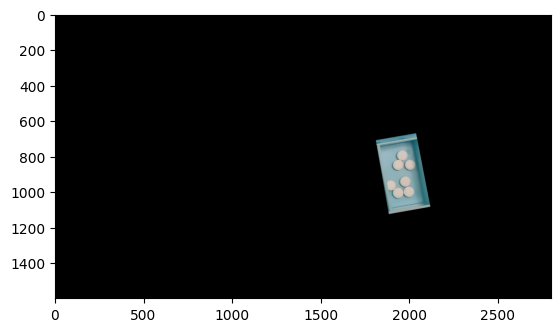

In [8]:
num_labels, labels = cv2.connectedComponents(hough_lines, connectivity= 4)
pillbox2 = pillbox.copy()
pillbox2[labels != 21] = 0
plt.imshow(pillbox2)

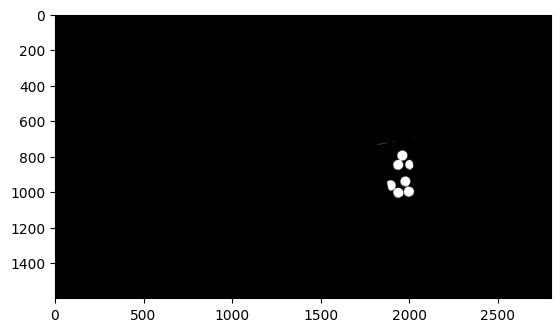

In [9]:
_, binar = cv2.threshold(cv2.cvtColor(pillbox2, cv2.COLOR_RGB2GRAY), 185, 255, cv2.THRESH_BINARY)
plt.imshow(binar, cmap = 'gray')

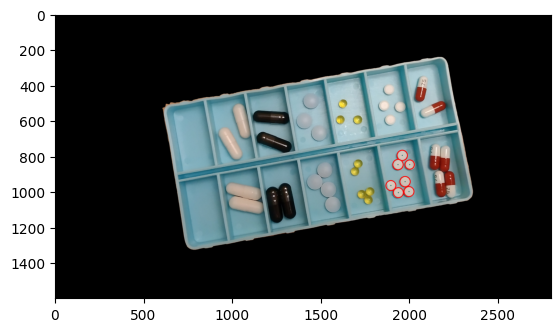

In [56]:
circles = cv2.HoughCircles(binar, cv2.HOUGH_GRADIENT, 1, 30,
                               param1=100, param2=14,
                               minRadius=10, maxRadius=70)

src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)

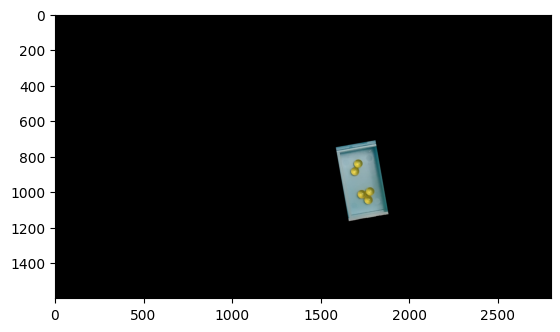

In [59]:
pillbox3 = pillbox.copy()
pillbox3[labels != 22] = 0
plt.imshow(pillbox3)

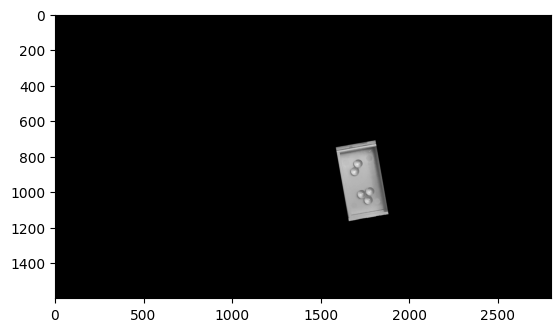

In [63]:
binar = cv2.cvtColor(pillbox3, cv2.COLOR_RGB2GRAY)
plt.imshow(binar, cmap = 'gray')

[[[1774.5  998.5   23.5]
  [1708.5  842.5   24.1]
  [1766.5 1048.5   23. ]
  [1726.5 1017.5   25.7]
  [1688.5  885.5   24.6]]]


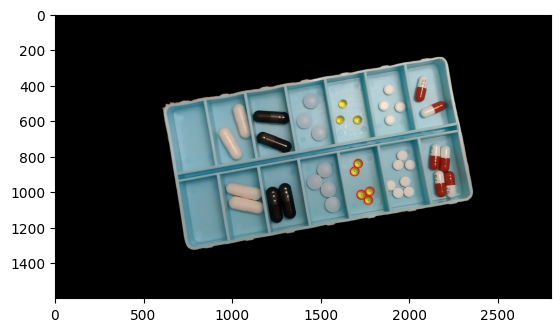

In [72]:
circles = cv2.HoughCircles(binar, cv2.HOUGH_GRADIENT, 1, 10,
                               param1=100, param2=28,
                               minRadius=10, maxRadius=40)
print(circles)
src = pillbox.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 0), 3)


plt.imshow(src)